# 🏠 House Price Prediction (Simple Linear Regression)

## 1. Problem Setup
We want to predict **house price** based on **house size (sqft)**.  

- **Input (X / Feature):** House size  
- **Output (y / Target):** House price  
- **Relationship:** Bigger house → higher price  

---

## 2. Equation of Line (to get the line)
\[
y = m ⋅ x + b
\]

- `x` = house size (independent variable)  
- `y` = house price (dependent variable)  
- `m` = slope → How steep the line is
  - “How much does price change if size increases by 1 sqft?”
- `b` = intercept → Where the line cuts the Y-axis (when x = 0).
  - “What’s the predicted price of a house if size = 0?”



---


## 3. Train/Test Split
- Dataset is divided into **training** and **testing** sets.  
- Example: 80 houses for training, 20 houses for testing.  
- Purpose: Train the model on known data → test on unseen data to check accuracy.  

---

## 4. Model Training
👉 After training, the model finds the **best `m` and `b`** to fit the data.

This gives the line equation:  

\[
{Price} = m ⋅ {Size} + b
\]

- u think, when we'll give a data set of 80 houses having house size (in x axis) & house price (in y-axis), then after creating dots for every size-price point a slope will be created nah ! that would be m

- nd the point on y-axis i.e. on price axis this slope(m) will cut when x i.e. size=0, that point on y is b i.e. intercept.

- when model will get m & b after being trained, then for any value of x we can get/predict value of y nah !

- let's suppose our model findout m = 200 & b = 50,000
Visual Intuition

- Imagine your line looks like this :-  Price = 200 ⋅ Size + 50,000

- Slope (m = 200) ; i.e. Each extra sqft adds ₹200 to price

- Intercept (b = 50,000) ; i.e. Even a “0 sqft” house has a base value of ₹50,000 (maybe land, location, or just noise in data).

```ascii
Price (₹)
^
|          •
|         •
|        •
|       •
|      •
|     •      /
|    •     /
|   •    /
|  •   /
| •  /
+------------------> Size (sqft)

Each • = one house (size vs price)
/ = the regression line

The line (m = slope) goes through the middle of the cloud
Slope (m) → tilt of the line (how fast price rises per sqft)
Intercept (b) → where line hits Y-axis (price if size = 0)

The regression-line is not forced to pass through all dots,
it’s the “best compromise” to minimize overall distance (errors) between dots and line.
```
---

## 5. Model Evaluation
We compare predictions vs actual test values using metrics like:  
- **Mean Squared Error (MSE)** → how far predictions are from actual  
- **R² score** → how well line fits the data  

---

## 6. Key Intuition
- Machine “learns” the relationship between size and price.  
- Once trained, we can give a **new house size** and predict its price.  
- Example: `Size = 2000 sqft → Predicted Price = ?`  

---


In [10]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [11]:
# Example data: Size of house (sqft), Price (in lakhs)
data = {
    'house_size': [750, 800, 850, 900, 950, 1000, 1100, 1200, 1300, 1400,
             1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400,
             2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400,
             3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400,
             4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400,
             5500, 5600, 5700, 5800, 5900, 6000, 6100, 6200, 6300, 6400,
             6500, 6600, 6700, 6800, 6900, 7000, 7100, 7200, 7300, 7400,
             7500, 7600, 7700, 7800, 7900, 8000, 8100, 8200, 8300, 8400,
             8500, 8600, 8700, 8800, 8900, 9000, 9100, 9200, 9300, 9400,
             9500, 9600, 9700, 9800, 9900, 10000, 10100, 10200, 10300, 10400],
    'house_price': [25, 27, 29, 31, 33, 35, 38, 41, 44, 47,
              50, 53, 56, 59, 62, 65, 68, 71, 74, 77,
              80, 83, 86, 89, 92, 95, 98, 101, 104, 107,
              110, 113, 116, 119, 122, 125, 128, 131, 134, 137,
              140, 143, 146, 149, 152, 155, 158, 161, 164, 167,
              170, 173, 176, 179, 182, 185, 188, 191, 194, 197,
              200, 203, 206, 209, 212, 215, 218, 221, 224, 227,
              230, 233, 236, 239, 242, 245, 248, 251, 254, 257,
              260, 263, 266, 269, 272, 275, 278, 281, 284, 287,
              290, 293, 296, 299, 302, 305, 308, 311, 314, 317]
}

df = pd.DataFrame(data)

X = df[['house_size']]
y = df['house_price']


'''
General Rule (remember this forever ⚡):

X → always 2D (matrix of features) → df[[...]]

y → always 1D (vector of targets) → df[...]
'''

'\nGeneral Rule (remember this forever ⚡):\n\nX → always 2D (matrix of features) → df[[...]]\n\ny → always 1D (vector of targets) → df[...]\n'

In [12]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=92, shuffle=True)

'''
test_size=0.2 means:
-> 20% of your data goes to test set & 80% goes to training set
-> Example:- we had 100 houses, so 80 house size nd price goes for model training & 20 for model testing


random_state=42:
-> Sets seed for reproducible splits.
-> Same data every time we run code.
-> And 42 = just a common "random" number (from Hitchhiker's Guide to Galaxy).
-> It could be any number: 0, 123, 420, etc.


shuffle=True (default): Shuffle data before splitting

'''

'\ntest_size=0.2 means:\n-> 20% of your data goes to test set & 80% goes to training set\n-> Example:- we had 100 houses, so 80 house size nd price goes for model training & 20 for model testing\n\n\nrandom_state=42:\n-> Sets seed for reproducible splits.\n-> Same data every time we run code.\n-> And 42 = just a common "random" number (from Hitchhiker\'s Guide to Galaxy).\n-> It could be any number: 0, 123, 420, etc.\n\n\nshuffle=True (default): Shuffle data before splitting\n\n'

In [13]:
model = LinearRegression() # i.e. we're creating a Linear Regression model Object

In [14]:
model.fit(X_train,y_train) # here our created model learns the Relationship between X and y i.e. btn house size & price :)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
# After model knows the relationship betwen X_train(house sizes given for training) & y_train(i.e. house prices given fro training),
# it concludes 'm' i.e. slope/co-efficient and 'b' i.e. intercept
print(model.coef_)
print(model.intercept_)

[0.03004183]
4.694981196067914


In [16]:
y_predict = model.predict(X_test) # now our model will predict the 20% house's price using given house size i.e. X_test

In [17]:
# after getting predicted house price, we'll find error btn actual 20% house's price which is y_test & y_predict
mse = mean_squared_error(y_test, y_predict)
print("Mean squared Error: ", mse)
# The less the MSE will come the better the result, abviously right?
# cuz, less error means our model's predicted price & actual price both have very less difference

Mean squared Error:  0.09243526784444721


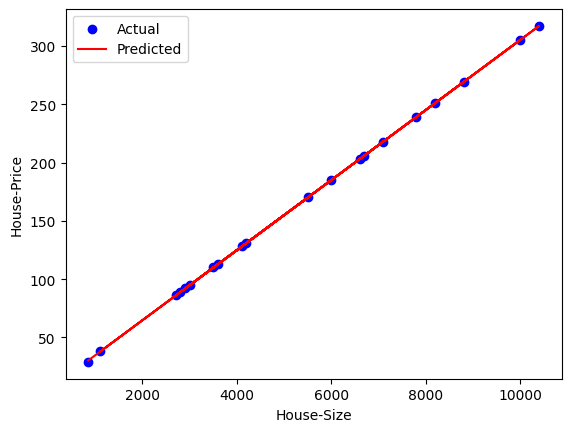

In [18]:
# Time it's time to plot
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_predict, color='red', label='Predicted')
plt.xlabel('House-Size')
plt.ylabel('House-Price')
plt.legend()
plt.show()
